# 1. Installing and Importing Dependencies

In [12]:
# !pip install pyglet

In [2]:
!pip install gym[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pygame 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [5]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [6]:
!pip install git+https://github.com/DLR-RM/stable-baselines3#egg=stable-baselines3[extra]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/DLR-RM/stable-baselines3 to /tmp/pip-install-lawb4ddm/stable-baselines3_478671dec1914aadb5492bc2ddb7f2f2
  Running command git clone -q https://github.com/DLR-RM/stable-baselines3 /tmp/pip-install-lawb4ddm/stable-baselines3_478671dec1914aadb5492bc2ddb7f2f2
  Using cached gym-0.21.0-py3-none-any.whl
     |████████████████████████████████| 776.3 MB 20 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.8.2+cu111
    Uninstalling torch-1.8.2+cu111:
      Successfully uninstalled torch-1.8.2+cu111
  Attempting uninstall: gym
    Found existing installation: gym 0.24.1
    Uninstalling gym-0.24.1:
      Successfully uninstalled gym-0.24.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.9.2+cu111 requir

In [8]:
!pip install torch==1.8.2 torchvision==0.9.2 torchaudio==0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu111

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/lts/1.8/cu111
tcmalloc: large alloc 1982201856 bytes == 0x3ab2000 @  0x7f49a0fca1e7 0x4a3940 0x5b438c 0x5ea94f 0x5939cb 0x594cd3 0x5d0ecb 0x59aeca 0x515655 0x593dd7 0x511e2c 0x593dd7 0x511e2c 0x549e0e 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549e0e 0x4bca8a 0x59c019
tcmalloc: large alloc 1982201856 bytes == 0x79d12000 @  0x7f49a0fca1e7 0x4a3940 0x5b438c 0x64cfe7 0x59b076 0x515655 0x593dd7 0x511e2c 0x593dd7 0x511e2c 0x549e0e 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549e0e 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576
tcmalloc: large alloc 1982201856 bytes == 0xeff72000 @  0x7f49a0fca1e7 0x4a3940 0x59b5e2 0x63a515 0x63bd66 0x63be16 0x59afff 0x515655 0x593dd7 0x511e2c 0x549576 0x593fce 0x

In [7]:
!pip install gym==0.24.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gym-0.24.1-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.21.0
    Uninstalling gym-0.21.0:
      Successfully uninstalled gym-0.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 1.6.1a0 requires gym==0.21, but you have gym 0.24.1 which is incompatible.


In [9]:
import gym
from gym.spaces import Box, Discrete
from gym.wrappers import FrameStack
from matplotlib import pyplot as plt
import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))
gym.__version__

'0.24.1'

In [10]:
import torch
from torch import nn
from torchvision import transforms as T
from PIL import Image
from matplotlib import cm
import numpy as np
from pathlib import Path
from collections import deque
import random, datetime, copy

In [11]:
# Change working directory
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/SUTD/AI Lab')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/SUTD/AI Lab


# 2. Loading the environment

In [12]:
env = gym.make('CarRacing-v1')

/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:98: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  "We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) "


In [13]:
obs_space = env.observation_space
action_space = env.action_space
print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))
print("The action space is bounded: {}".format(action_space.is_bounded()))
print("The action space Upper Bound: {}".format(action_space.high))
print("The action space Lower Bound: {}".format(action_space.low))

The observation space: Box(0, 255, (96, 96, 3), uint8)
The action space: Box([-1.  0.  0.], 1.0, (3,), float32)
The action space is bounded: True
The action space Upper Bound: [1. 1. 1.]
The action space Lower Bound: [-1.  0.  0.]


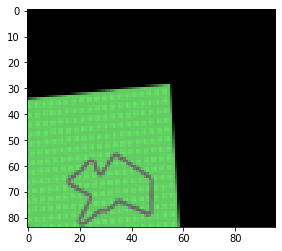

In [14]:
#Lets take a look at our environment
obs = env.reset()
plt.imshow(obs[:-12], interpolation='nearest')
plt.show()

[-0.800846    0.65822065  0.72694904]
5.960606060606061 False {}


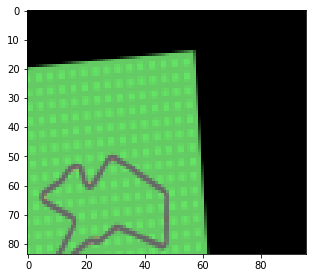

In [15]:
# Sample a random action from the entire action space
random_action = env.action_space.sample()
print(random_action)
# Take the action and get the new observation space
new_obs, reward, done, info = env.step(random_action)
print(reward, done, info)
plt.figure(figsize=(5,5))
plt.imshow(new_obs[:-12], interpolation='nearest')
plt.show()

# 3. Wrappers

## Observation Wrappers

In [28]:
import cv2
class GrayScaleObservation(gym.ObservationWrapper):
    def __init__(self, env):
        super().__init__(env)
        obs_shape = self.observation_space.shape[:2]
        self.observation_space = Box(low=0, high=255, shape=obs_shape, dtype=np.uint8)

    def permute_orientation(self, observation):
        # permute [H, W, C] array to [C, H, W] tensor
        observation = np.transpose(observation, (2, 0, 1))
        observation = torch.tensor(observation.copy(), dtype=torch.float)
        return observation

    def observation(self, observation):
        # observation = self.permute_orientation(observation)
        transform = T.Grayscale()
        observation = transform(observation)
        return observation

# class ObservationWrapper(gym.ObservationWrapper):
#     def __init__(self, env):
#         super().__init__(env)
    
#     def observation(self, obs):
#         # Normalise observation by 255
#         return obs / 255.0

class ObservationWrappers(gym.ObservationWrapper):
    def __init__(self, env):
        super().__init__(env)
        obs_shape = self.observation_space.shape[:2]
        self.observation_space = Box(low=0, high=255, shape=obs_shape, dtype=np.uint8)
        self.frames = []

    def permute_orientation(self, observation):
        # permute [H, W, C] array to [C, H, W] tensor
        observation = np.transpose(observation, (2, 0, 1))
        observation = torch.tensor(observation.copy(), dtype=torch.float)
        return observation

    def blur_image(self, observation):
        blur = cv2.GaussianBlur(observation, (5, 5), 0)
        return blur

    def observation(self, observation):
        cropped = observation[:-12]
        cropped = cv2.copyMakeBorder(cropped, 0, 12, 0, 0, cv2.BORDER_CONSTANT, value=[0, 0, 0])
        gray = cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY)
        blur = self.blur_image(gray)
        canny = self.canny_edge_detector(blur)

        self.frames.append(canny)
        return canny

    def canny_edge_detector(self, observation):
        canny = cv2.Canny(observation, 50, 150)
        return canny

    def generate_video(self):
        print("generating video")
        fourcc = cv2.VideoWriter_fourcc("M", "J", "P", "G")
        self.video = cv2.VideoWriter("./video.avi", fourcc, 20, (17, 49))

        for i in range(len(self.frames)):
            self.video.write(self.frames[i])
        self.video.release()

class ResizeObservation(gym.ObservationWrapper):
    def __init__(self, env, shape):
        super().__init__(env)
        if isinstance(shape, int):
            self.shape = (shape, shape)
        else:
            self.shape = tuple(shape)

        obs_shape = self.shape + self.observation_space.shape[2:]
        self.observation_space = Box(low=0, high=255, shape=obs_shape, dtype=np.uint8)

    def permute_orientation(self, observation):
        # permute [H, W, C] array to [C, H, W] tensor
        observation = np.transpose(observation, (2, 0, 1))
        observation = torch.tensor(observation.copy(), dtype=torch.float)
        return observation

    def observation(self, observation):
        transforms = T.Compose(
            [T.Resize(self.shape), T.Normalize(0, 255)]
        )
        observation = self.permute_orientation(observation)
        observation = transforms(observation).squeeze(0)
        return observation

### Example of using observation wrappers

/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:98: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  "We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) "


[0.5711415  0.16243146 0.6468535 ]
6.702721088435374 False {}


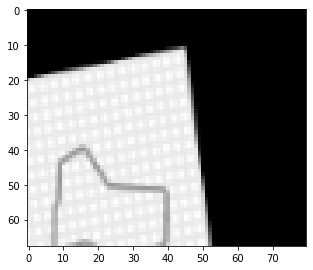

In [27]:
env = gym.make('CarRacing-v1')
env.reset()
env = GrayScaleObservation(ResizeObservation(env, (80,80)))

random_action = env.action_space.sample()
print(random_action)
# Take the action and get the new observation space
new_obs, reward, done, info = env.step(random_action)

print(reward, done, info)
plt.figure(figsize=(5,5))
plt.imshow(new_obs[0,:,:][:-12], cmap='gray',interpolation='nearest')
plt.show()

## Reward Wrappers

In [29]:
class RewardWrapper(gym.RewardWrapper):
    def __init__(self, env):
        super().__init__(env)

    def reward(self, reward):
        return np.clip(reward, a_min=-1.0, a_max=1.0) # from https://notanymike.github.io/Solving-CarRacing/

## Action Wrappers
Map actions to discrete spaces.

Reason: Suppose you want to train a (D)DQN agent for an environment with continuous actions. Since DQN implementations typically expect to produce a single discrete action, the action space has to both be discretized and flattened.

In [30]:
class ActionWrapper(gym.ActionWrapper):
    def __init__(self, env):
        super().__init__(env)
    
    def action(self, act):
        print(act)
        return act

# class DiscreteWrapper(gym.Wrapper):
#     def __init__(self, env):
#         super().__init__(env)
#         self.env = env
#         self.__actions__ = [(-1, 0.2, 0.), (0, 0.2, 0.), (1, 0.2, 0.),
#                             (-1, 0.5, 0.), (0, 0.5, 0.), (1, 0.5, 0.), #           Action Space Structure
#                             (-1, 1,   0), (0, 1,   0), (1, 1,   0), #        (Steering Wheel, Gas, Break)
#                             (-1, 0, 0.8), (0, 0, 0.8), (1, 0, 0.8), # Range        -1~1       0~1   0~1
#                             (-1, 0, 0.3), (0, 0, 0.3), (1, 0, 0.3),
#                             (-1, 0,   0), (0, 0,   0), (1, 0,   0)]

        
#         self.action_space = Discrete(len(self.__actions__)-1)
        
#     def step(self, action):
#         # print(action)
#         next_state, reward, done, info = self.env.step(self.__actions__[action])
#         # modify ...
#         return next_state, reward, done, info

class DiscreteWrapper(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.env = env
        self.__actions__ = [(-1, 0.5, 0.), (0, 0.5, 0.), (1, 0.5, 0.), #           Action Space Structure
                            (-1, 1,   0), (0, 1,   0), (1, 1,   0), #        (Steering Wheel, Gas, Break)
                            (-1, 0, 0.8), (0, 0, 0.8), (1, 0, 0.8), # Range        -1~1       0~1   0~1,
                            (-1, 0,   0)]

        
        self.action_space = Discrete(len(self.__actions__)-1)
        
    def step(self, action):
        # print(action)
        next_state, reward, done, info = self.env.step(self.__actions__[action])
        # modify ...
        return next_state, reward, done, info

### Example of using action wrappers

9
6.8204152249134955 False {}


/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:98: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  "We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) "


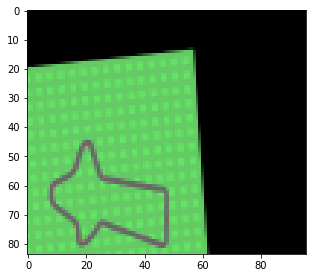

In [30]:
env = gym.make('CarRacing-v1')
env.reset()
env = DiscreteWrapper(env)

random_action = env.action_space.sample()
print(random_action)
# Take the action and get the new observation space
new_obs, reward, done, info = env.step(random_action)

print(reward, done, info)
plt.figure(figsize=(5,5))
plt.imshow(new_obs[:-12], cmap='gray',interpolation='nearest')
plt.show()

## Other Wrappers

In [31]:
class SkipFrame(gym.Wrapper):
    def __init__(self, env, skip):
        """Return only every `skip`-th frame"""
        super().__init__(env)
        self._skip = skip

    def step(self, action):
        """Repeat action, and sum reward"""
        total_reward = 0.0
        done = False
        for i in range(self._skip):
            # Accumulate reward and repeat the same action
            obs, reward, done, info = self.env.step(action)
            total_reward += reward
            if done:
                break
        return obs, total_reward, done, info

**Vectorized Environments** are a method for stacking multiple independent environments into a single environment. **Instead of training an RL agent on 1 environment per step**, it allows us to **train it on n environments per step**. Because of this, actions passed to the environment are now a vector (of dimension n). It is the same for observations, rewards and end of episode signals (dones). In the case of non-array observation spaces such as Dict or Tuple, where different sub-spaces may have different shapes, the sub-observations are vectors (of dimension n).

In [32]:
class VectorizedEnvWrapper(gym.Wrapper):
    def __init__(self, make_env, num_envs=1):
        super().__init__(make_env())
        self.num_envs = num_envs
        self.envs = [make_env() for env_index in range(num_envs)]
    
    def reset(self):
        return np.asarray([env.reset() for env in self.envs])
    
    def reset_at(self, env_index):
        return self.envs[env_index].reset()
    
    def step(self, actions):
        next_states, rewards, dones, infos = [], [], [], []
        for env, action in zip(self.envs, actions):
            next_state, reward, done, info = env.step(action)
            next_states.append(next_state)
            rewards.append(reward)
            dones.append(done)
            infos.append(info)
        return np.asarray(next_states), np.asarray(rewards), \
            np.asarray(dones), np.asarray(infos)

### Example of using Vec Env

/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:98: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  "We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) "


(3, 96, 96, 3)
(3,)
(3,)


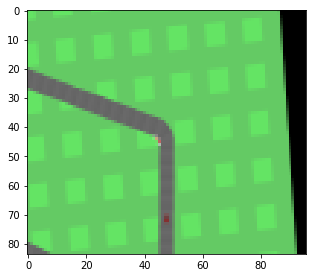

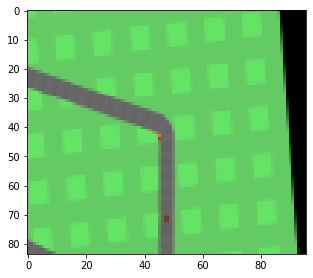

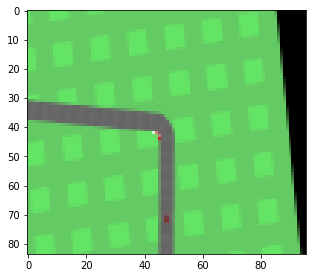

In [33]:
# Example on how Vec Env is used Vec Env
env = VectorizedEnvWrapper(lambda: gym.make('CarRacing-v1'), 3)

T = 10
observations = env.reset()
for t in range(T):
    actions = []
    for i in range(3):
      actions.append(env.action_space.sample())

    observations, rewards, dones, infos = env.step(actions)  
    for i in range(len(dones)):
        if dones[i]:
            observations[i] = env.reset_at(i)
print(observations.shape)
print(rewards.shape)
print(dones.shape)

for i in observations:
  plt.figure(figsize=(5,5))
  plt.imshow(i[:-12], interpolation='nearest')
  plt.show()

## Customised env make

In [20]:
from stable_baselines3.common.vec_env.subproc_vec_env import SubprocVecEnv
from stable_baselines3.common.vec_env.vec_normalize import VecNormalize
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.utils import set_random_seed

def make_vec_env(env_id, rank, seed=0):
    def _init():
        env = gym.make(env_id)
        env.seed(seed + rank)
        env = SkipFrame(env, 2)
        env = ObservationWrappers(env)
        env = DiscreteWrapper(env) #discretize actions
        return env

    set_random_seed(seed)
    return _init

In [21]:
def env_make():
    env = gym.make('CarRacing-v1')
    env = SkipFrame(env, 2)
    env = ObservationWrappers(env)
    env = DiscreteWrapper(env) #discretize actions
    # env = FrameStack(env, num_stack=2)
    return env

# Train an RL Model

In [ ]:
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.results_plotter import load_results, ts2xy
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """
    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

          # Retrieve training reward
          x, y = ts2xy(load_results(self.log_dir), 'timesteps')
          if len(x) > 0:
              # Mean training reward over the last 100 episodes
              mean_reward = np.mean(y[-100:])
              if self.verbose > 0:
                print("Num timesteps: {}".format(self.num_timesteps))
                print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(self.best_mean_reward, mean_reward))

              # New best model, you could save the agent here
              if mean_reward > self.best_mean_reward:
                  self.best_mean_reward = mean_reward
                  # Example for saving best model
                  if self.verbose > 0:
                    print("Saving new best model to {}".format(self.save_path))
                  self.model.save(self.save_path)

        return True

In [22]:
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
env = env_make()
env = SubprocVecEnv([make_vec_env("CarRacing-v1", i) for i in range(4)])
env = VecNormalize(env, norm_obs=True, norm_reward=True, clip_obs=10.0)

model = DQN("MlpPolicy",
            env,
            verbose=1,
            train_freq=16,
            gradient_steps=8,
            gamma=0.99,
            exploration_fraction=0.2,
            exploration_final_eps=0.07,
            target_update_interval=600,
            learning_starts=1000,
            buffer_size=10000,
            batch_size=128,
            learning_rate=4e-3,
            policy_kwargs=dict(net_arch=[256, 256]),
            seed=2,
            tensorboard_log="logs/dqn_felice",
            callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir="logs/dqn_felice"))

/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:98: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  "We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) "


Using cuda device


In [ ]:
models_dir = "./DQN"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

TIMESTEPS = 20000 # The number of env steps for each epoch
epochs = 100  # Number of training iterations

for i in range(1,epochs):
  model.learn(total_timesteps=TIMESTEPS,reset_num_timesteps=False,tb_log_name="DQN Wrapped",)
  model.save(f"{models_dir}/{TIMESTEPS*i}")

# 4. Save and Reload Model

In [38]:
model.save(f"{models_dir}/{TIMESTEPS*19}")

In [51]:
print(f"{models_dir}/{TIMESTEPS*18}.zip")

./DQN/190000.zip


In [25]:
models_dir = "./DQN"
TIMESTEPS = 20000
env = env_make()
obs = env.reset()
model = DQN.load(f"{models_dir}/{TIMESTEPS*18}.zip", env=env)

/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:98: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  "We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) "


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.7/dist-packages/gym/core.py:201: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  "Function `env.seed(seed)` is marked as deprecated and will be removed in the future. "


In [ ]:
model.learn(total_timesteps=20000)

In [27]:
import imageio
print("loading model...")
obs = env.reset()
img = env.render(mode="rgb_array")
model = DQN.load(f"{models_dir}/{TIMESTEPS*18}.zip", env=env)
print("model successfully loaded!")
mean_reward, std_reward = evaluate_policy(
    model, model.get_env(), n_eval_episodes=10
)
print(f"Mean reward: {mean_reward}")
print(f"Std dev reward: {std_reward}")

images = []
print("Beginning episodic iteration")
for i in range(3000):
    images.append(img)
    action, _ = model.predict(obs)
    obs, _, _, _ = env.step(action)
    img = env.render(mode="rgb_array")
imageio.mimsave(
    "car_dqn_wrapped.gif",
    [np.array(img) for i, img in enumerate(images) if i % 2 == 0],
    fps=29,
)
print(".gif saved!")

loading model...
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.7/dist-packages/gym/core.py:201: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  "Function `env.seed(seed)` is marked as deprecated and will be removed in the future. "


model successfully loaded!
Mean reward: -91.8893803
Std dev reward: 2.6866195018566
Beginning episodic iteration
.gif saved!


# 5. Evaluation

In [ ]:
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

# We can review the training performance for 10 episodes
num_steps=10
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for ep in range(num_steps):
    screen = env.render(mode='rgb_array')
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

    done = False
    while not done:
        screen = env.render(mode='rgb_array')
        plt.imshow(screen)
        ipythondisplay.clear_output(wait=True)
        ipythondisplay.display(plt.gcf())
        obs, reward, done, info = env.step(env.action_space.sample())

env.close()

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

# 6. Test Model

In [ ]:
episodes = 5 
for episode in range(1, episodes+1):
  obs = env.reset()
  # gives the initial observation for the environment 
  
  done = False
  score = 0

  while not done:
    env.render()
    action , _ = model.predict(obs) # Now USING MODEL HERE!
    obs, reward, done, info = env.step(action)
    score += reward
  print ("Episode: {} Score: {}".format(episode, score))

env.close()